In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path_data1 = os.path.join(".", "lab4_dataset1.csv")
path_data2 = os.path.join(".", "lab4_dataset2.csv")

import builtins

def print(*args, **kwargs):
    kwargs['sep'] = ''
    return builtins.print(*args, **kwargs)
    
plt.rcParams['figure.figsize'] = (6, 4)

### Lab Task 1

In [12]:
"""
a)	Create a Pandas series using a dictionary and display the output.
b)	Create a Pandas dataframe using a dictionary and display the output. 
Provide all of the codes and screenshots of the final outputs.
"""

series = pd.Series({"a": 1, "b": 2, "c": 3})
print("Series:\n", series)

dataframe = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
print("\nDataframe:\n", dataframe)

Series:
a    1
b    2
c    3
dtype: int64

Dataframe:
   a  b  c
0  1  4  7
1  2  5  8
2  3  6  9


### Lab Task 2

In [13]:
"""
Load dataset 1 into a dataframe and perform the following
a)	Print the dataset using the head and tail functions
b)	Print any 3 rows from the dataset
c)	Print any 5 elements from the dataset
d)	Use the mean, mode and median functions for each column in the dataset
Provide all of the codes and screenshots of the final output.
"""

df = pd.read_csv(path_data1)
print("Head:\n", df.head(), sep='')
print("\nTail:\n", df.tail())
print("\n3 rows:\n", df.iloc[0:3])
print("\n5 elements:\n", df.iloc[1:6, 1:6])
print("\nMean of each column:\n", df.mean())
print("\nMode of each column:\n", df.mode().iloc[0])
print("\nMedian of each column:\n", df.median())

Head:
    x1     x2
0  1.2  39344
1  1.4  46206
2  1.6  37732
3  2.1  43526
4  2.3  39892

Tail:
      x1      x2
25   9.1  105583
26   9.6  116970
27   9.7  112636
28  10.4  122392
29  10.6  121873

3 rows:
    x1     x2
0  1.2  39344
1  1.4  46206
2  1.6  37732

5 elements:
      x2
1  46206
2  37732
3  43526
4  39892
5  56643

Mean of each column:
x1        5.413333
x2    76004.000000
dtype: float64

Mode of each column:
x1        3.3
x2    37732.0
Name: 0, dtype: float64

Median of each column:
x1        4.8
x2    65238.0
dtype: float64


### Lab Task 3

In [14]:
"""
Load dataset 2 into a dataframe.
a)	Write code to remove the incomplete rows from the dataset
b)	Write code to remove the duplicated rows from the dataset
c)	Save the cleaned dataset into a dataframe. You need to attach this cleaned dataset file (renamed to lab4_task3.csv) in your lab submission.
"""

df = pd.read_csv(path_data2)
df = df.dropna()
df = df.drop_duplicates()
df.to_csv("lab4_task3.csv", index=False)

df.head()

,rooms,bedrooms,population,households,value,inland
0,880,129.0,322.0,126,452600,0
1,7099,1106.0,2401.0,1138,358500,0
2,1467,190.0,496.0,177,352100,1
3,1274,235.0,558.0,219,341300,1
4,1627,280.0,565.0,259,342200,1


### Lab Task 4

In [15]:
"""
For this task, you will need to use datasets 1 and 2. You will also require the matplotlib.pyplot module for plotting. Perform the following.
a)	Make line plots of the following equations for x = 1 to 100. You will need to make use of NumPy arrays for this part.
i.	y = 2x + 1
ii.	y = 3x**2
iii.	y = cos(x)
b)	Load dataset 1 and make a scatter plot (axes x1 and x2)
c)	Load the cleaned dataset 2 and make a scatter plot (axes x1 and x2). You need to use markers for the labels (y) such that 0 corresponds to a red circle and 1 corresponds to a blue square. The label y is the “inland” column. For x1 and x2, choose any 2 columns from the dataset and also mention the columns that you are using.
d)	Load the cleaned dataset 2 and make a 3-D scatter plot between any three features in the dataset (axes x1, x2, x3)
"""

# a)
x = np.linspace(1, 100, 1000)
y1 = 2 * x + 1
y2 = 3 * x ** 2
y3 = np.cos(x)

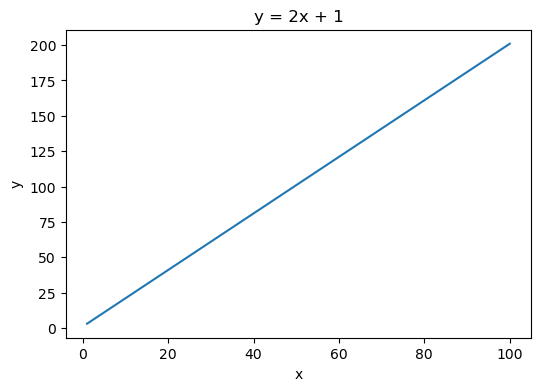

In [16]:
plt.plot(x, y1)
plt.title("y = 2x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

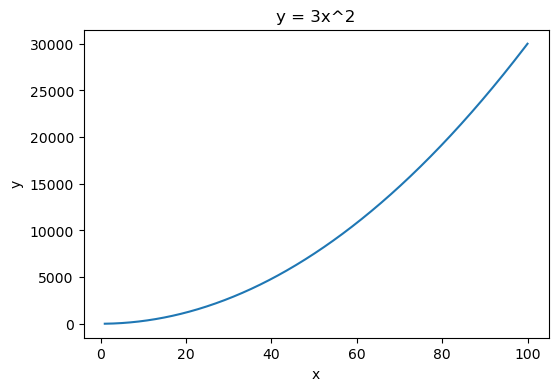

In [17]:
plt.plot(x, y2)
plt.title("y = 3x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

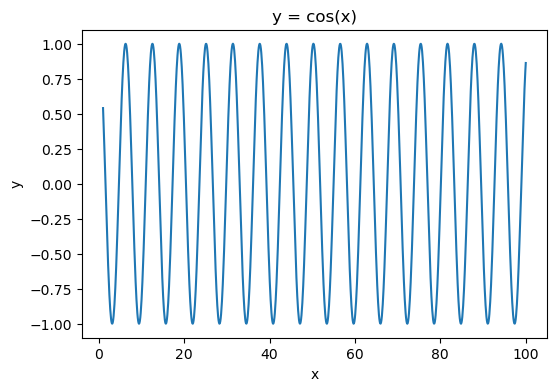

In [18]:
plt.plot(x, y3)
plt.title("y = cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

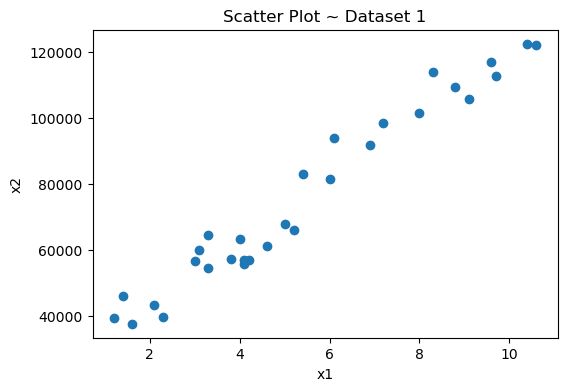

In [19]:
# b)
df = pd.read_csv(path_data1)
plt.scatter(df["x1"], df["x2"])
plt.title("Scatter Plot ~ Dataset 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

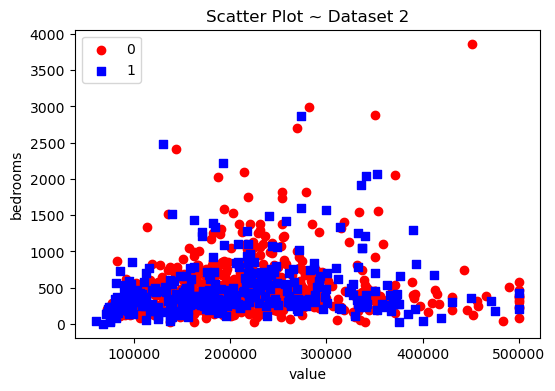

In [20]:
# c
df = pd.read_csv("lab4_task3.csv")
x1 = df["value"]
x2 = df["bedrooms"]
y = df["inland"]

fig, ax = plt.subplots()

markers = {0: "o", 1: "s"}
colors = {0: "red", 1: "blue"}

for label in y.unique():
    mask = y == label
    ax.scatter(
        x1[mask], x2[mask], marker=markers[label], color=colors[label], label=label
    )

ax.legend(loc="upper left")
plt.title("Scatter Plot ~ Dataset 2")
plt.xlabel("value")
plt.ylabel("bedrooms")
plt.show()

### Lab Task 5

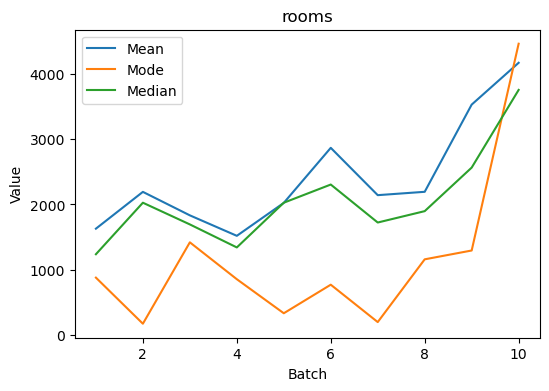

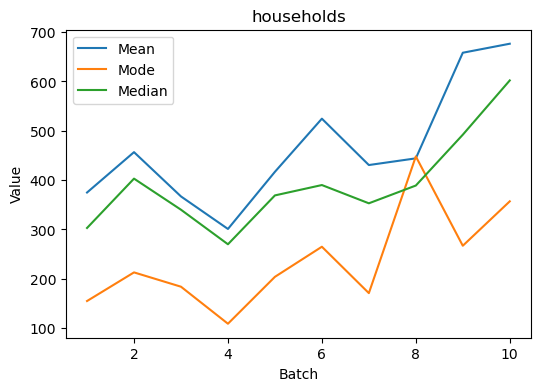

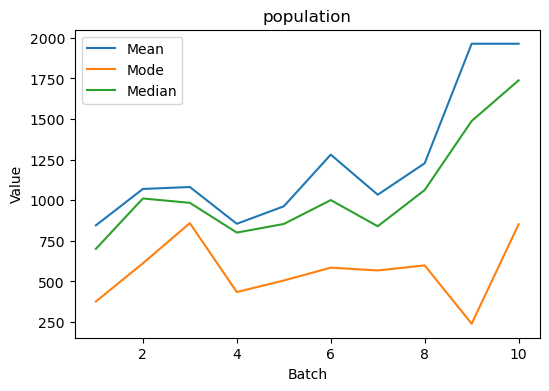

In [21]:
"""
Load the cleaned dataset 2 into as a dataframe. For this task, you will divide the dataset into 10 batches. For each individual batch, calculate the mean, mode and median for any 3 feature columns. Finally, make line plots showing the batch number on the x-axis and the mean, mode and median on the y-axis.
"""


def split_dataframe(df, chunk_size):
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i * chunk_size : (i + 1) * chunk_size])
    return chunks


df = pd.read_csv(path_data2)
df = df.dropna()
df = df.drop_duplicates()

batch_size = 10
batches = split_dataframe(df, len(df) // batch_size + 1)

# Features: "rooms", "households", "population"
features = ["rooms", "households", "population"]

for feature in features:
    mean = []
    mode = []
    median = []

    for batch in batches:
        mean.append(batch[feature].mean())
        mode.append(batch[feature].mode().iloc[0])
        median.append(batch[feature].median())

    plt.plot(range(1, len(batches) + 1), mean, label="Mean")
    plt.plot(range(1, len(batches) + 1), mode, label="Mode")
    plt.plot(range(1, len(batches) + 1), median, label="Median")
    plt.title(feature)
    plt.xlabel("Batch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

### Lab Task 6

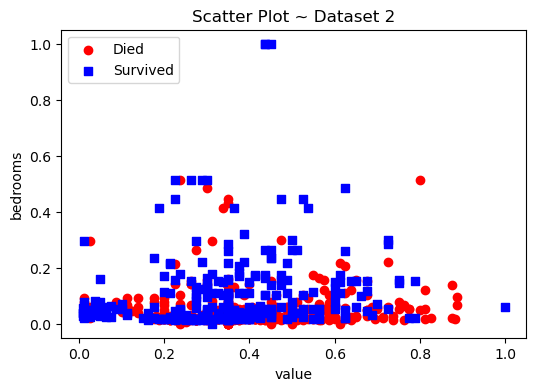

In [23]:
"""
Download your own CSV dataset from the internet (e.g. Kaggle). Your dataset must have at least 500 rows and at least 2 feature columns. Your dataset must also have a labels column with classification data (0/1). Make a scatter plot between the feature axes and show the labels with different markers. Provide all of the codes and screenshots of the plots. You will also need to submit the downloaded dataset with your report (renamed as lab4_task6.csv). Note that no two submitted datasets must be exactly the same.
"""

# https://www.kaggle.com/datasets/azeembootwala/titanic
df = pd.read_csv("lab4_task6.csv")
df.head()
df.to_csv("lab4_task6.csv", index=False)

x1 = df["Age"]
x2 = df["Fare"]
y = df["Survived"]

fig, ax = plt.subplots()

markers = {0: "o", 1: "s"}
colors = {0: "red", 1: "blue"}
labels = {0: "Died", 1: "Survived"}
for label in y.unique():
    mask = y == label
    ax.scatter(
        x1[mask],
        x2[mask],
        marker=markers[label],
        color=colors[label],
        label=labels[label],
    )

ax.legend(loc="upper left")
plt.title("Scatter Plot ~ Dataset 2")
plt.xlabel("value")
plt.ylabel("bedrooms")
plt.show()